In [15]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('/usr/local/lib/python3.9/site-packages'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

import csv
import scipy

import numpy as np
import pandas as pd
import modred as mr
import itertools as it
from pydmd import DMD, DMDc
from numpy import savetxt
from scipy import integrate
import scipy.spatial as sp
from scipy.linalg import svd
import matplotlib.pyplot as plt

from math import e

## Data

In [2]:
data_low_freq = pd.read_csv('data_for_DMDc2.csv', delimiter=',').values
data_high_freq = pd.read_csv('data_for_DMDc_high_freq.csv', delimiter=',').values
data_g_2 = pd.read_csv("./three_nodes_data_g_2.csv").values
data_off = pd.read_csv("./three_nodes_data_g_6.csv").values

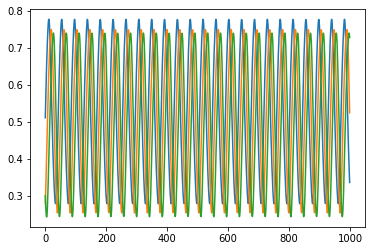

In [3]:
plt.plot(data_off[:1000,:])

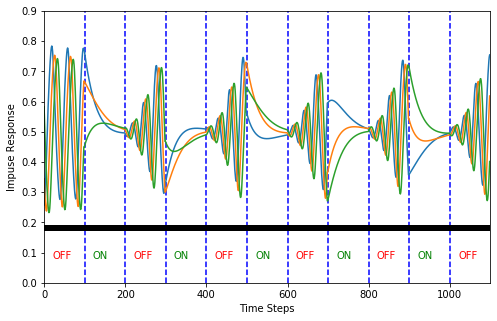

In [4]:
plt.figure(figsize=(8,5))
plt.plot(data_low_freq[:,:3])
plt.xlabel("Time Steps")
plt.ylabel("Impuse Response")

plt.axis([0, 1100, 0, 0.9])
plt.vlines(np.arange(1,11)*100, 0,9, "blue", "--")
plt.hlines(0.18, 0, 1100,linewidth=6, color= "black")
for i in np.arange(120,1000,200):
    plt.annotate("ON",xy=(i,0.08), color="green")
for i in np.arange(20,1100,200):
    plt.annotate("OFF",xy=(i,0.08),color="red")
# for i in np.arange(0,1200,200):
#     plt.axvspan(xmin=i, xmax=i+100, color="gray")
# for i in np.arange(100,1200,200):
#     plt.axvspan(xmin=i, xmax=i+100)


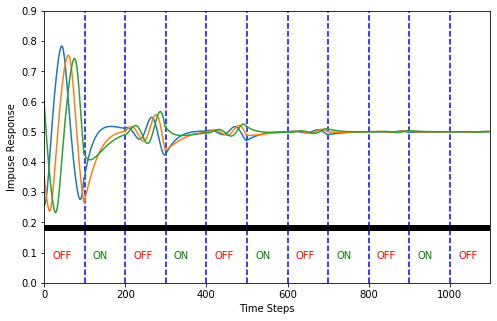

In [5]:
plt.figure(figsize=(8,5))
plt.plot(data_high_freq[:,:3])
plt.xlabel("Time Steps")
plt.ylabel("Impuse Response")

plt.axis([0, 1100, 0, 0.9])
plt.vlines(np.arange(1,11)*100, 0,9, "blue", "--")
plt.hlines(0.18, 0, 1100,linewidth=6, color= "black")
for i in np.arange(120,1000,200):
    plt.annotate("ON",xy=(i,0.08), color="green")
for i in np.arange(20,1100,200):
    plt.annotate("OFF",xy=(i,0.08),color="red")

Text(0, 0.5, 'Impuse Response')

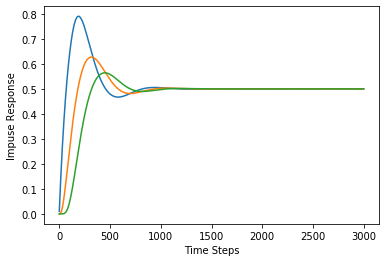

In [6]:
plt.figure(figsize=(6,4))
plt.plot(data_g_2[:3000,:3])
plt.xlabel("Time Steps")
plt.ylabel("Impuse Response")

## DMD

__DMD__  is a  purely data-driven method which finds the best fit linear model to approximate potentialy non-linear dynamics. 
In other words, DMD is a combo of Principal component analysis and Fourier transform

$X^{'} \simeq  AX,  $ 

*where X is the initial state matrix and $X^{'}$ is a state matrix shifted one step in time,and A (linear opertor) which explains the dynamics. *



__DMD__ approximates leading(dominant) eigenvalues of A without computing A. 
We predict the change of the system Without the control. 

Firs step to compute singular value decomposition 


(1)
U- dominant cohirent patterns of the dynamics (propal orthogonal decomposition) orginised in hierarhical order, so we need only 3 (?) as we will have only 3 actuators. 


$X=U\sum V^{*} \\
X^{'} = AU\sum V^{*}$



(2) we project A on U, so we have smaller matrix $\tilde{A}$



$U^{*}X^{'} V \sum^{-1} = U{*}AU = \tilde{A}$ 


(3)
eigenvalues of A


$\tilde{A}W = W \Lambda $

(4)
eigenvectors of A (from Kultz 2016): 


$\Phi=X^{'} V \sum^{-1}W$


Refferences: _Shmid 2010, Rowley, Mezlic et al. 2009, Tu, Rowley et al. 2014, Kutz, Brunton et al., 2016_


In [7]:
dmd_g_2 = DMD(svd_rank=-1) #automatically select number of modes
dmd_g_2.fit(data_g_2)

In [8]:
dmd_off = DMD(svd_rank=-1)
dmd_off.fit(data_off)

In [9]:
dmd_low_freq = DMD(svd_rank=-1)
dmd_low_freq.fit(data_low_freq)

In [10]:
dmd_high_freq = DMD(svd_rank=-1)
dmd_high_freq.fit(data_high_freq)

In [11]:
np.shape(data_high_freq)

(1099, 4)

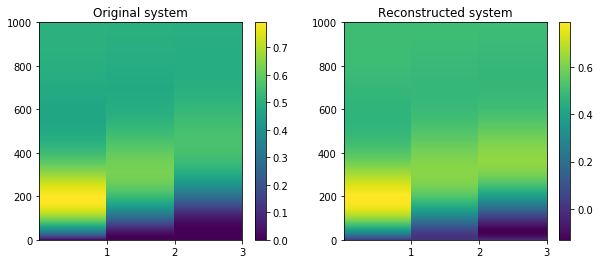

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('Original system')
plt.pcolor(data_g_2[:1000,:])
plt.colorbar()
plt.xticks(np.arange(1, 4, 1))

plt.subplot(122)
plt.title('Reconstructed system')
plt.pcolor(dmd_g_2.reconstructed_data.real[:1000,:])
plt.xticks(np.arange(1, 4, 1))
plt.colorbar()

plt.show()


In [24]:
for i in range(3):
    print("cosine distance between y%s:" %i,
          sp.distance.cosine(data_g_2[:1000,i], dmd_g_2.reconstructed_data.real[:1000,i]))

cosine distance between y0: 2.220446049250313e-16
cosine distance between y1: 0.0
cosine distance between y2: 0.006962600814470643


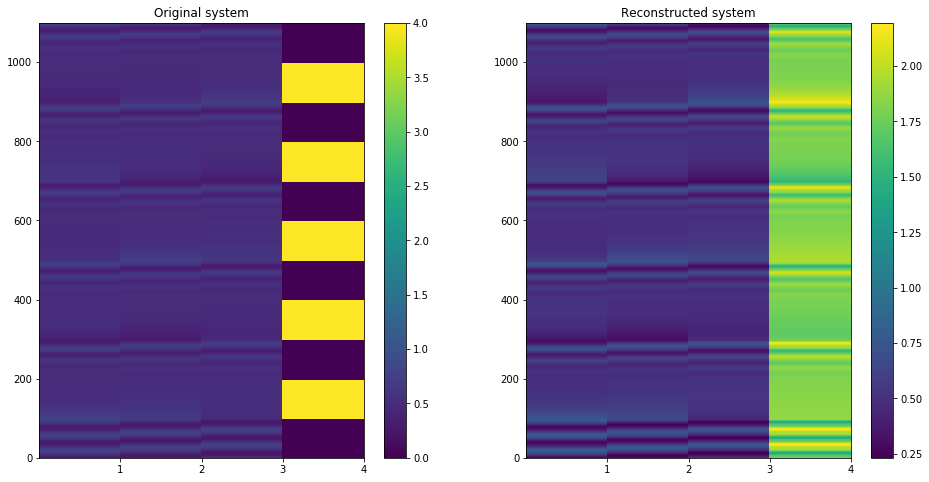

In [190]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title('Original system')
plt.pcolor(data_low_freq[:,:])
plt.colorbar()
plt.xticks(np.arange(1, 5, 1))

plt.subplot(122)
plt.title('Reconstructed system')
plt.pcolor(dmd_low_freq.reconstructed_data.real)
plt.xticks(np.arange(1, 5, 1))
plt.colorbar()

plt.show()

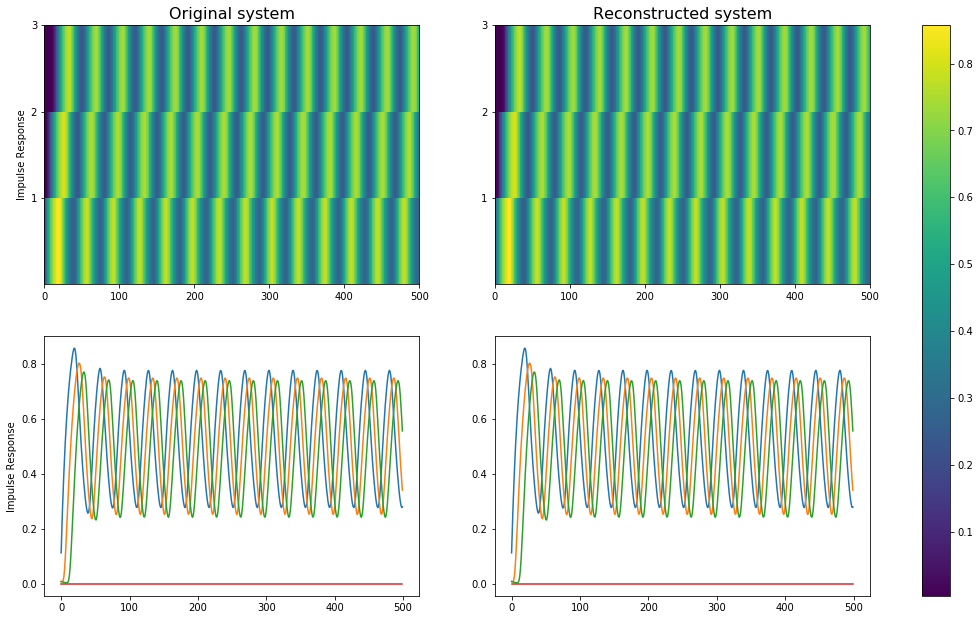

In [191]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)

ax[0,0].pcolor(data_off[:500,:3].T)
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
ax[0,0].set_yticks([1,2,3])
# ax[0,0].set_xlabel("Impulse Response")
# ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmd_off.reconstructed_data.real[:500,:3].T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})
ax[0,1].set_yticks([1,2,3])
# ax[0,1].set_xticks(np.arange(1, 4, 1))
# ax[0,1].set_xlabel("Impulse Response")
# ax[0,1].set_ylabel("Time Step")
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)
ax[1,0].plot(data_off[:500,:])

# ax[1,0].set_xlabel("Time Step")
# ax[1,0].set_ylabel("Impulse Response")
# ax[1,0].set_yticks([0,0.5,1])

ax[1,1].plot(dmd_off.reconstructed_data.real[:500,:])
# ax[1,1].set_yticks([0,0.5,1])
# ax[1,1].set_xlabel("Time Step")
# ax[1,1].set_ylabel("Impulse Response")
# ax.set_xlabel('common xlabel')
# ax.set_ylabel('common ylabel')
plt.setp(ax[:, 0], ylabel='Impulse Response')
plt.show()

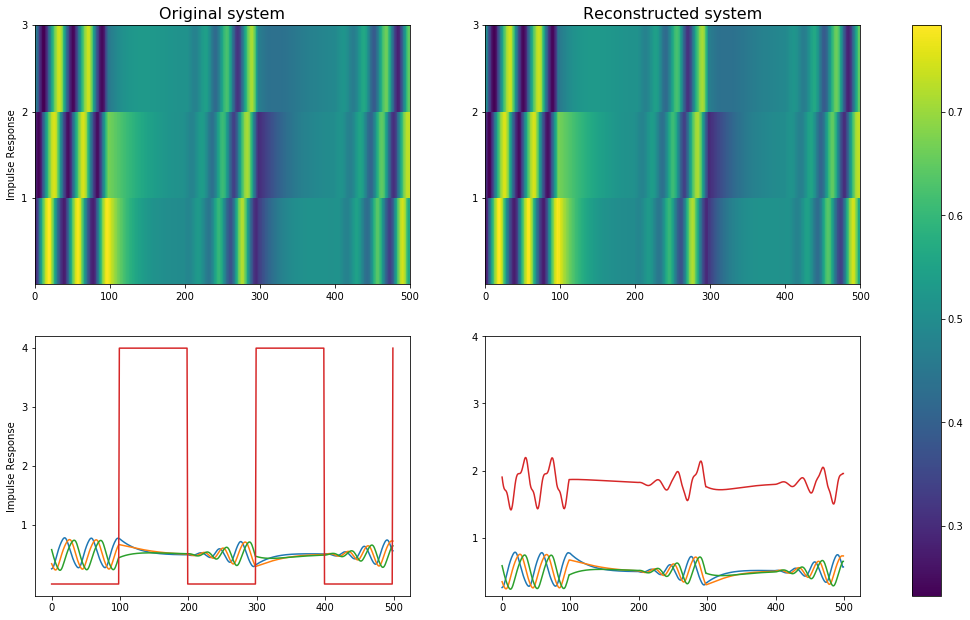

In [25]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)

ax[0,0].pcolor(data_low_freq[:500,:3].T)
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
ax[0,0].set_yticks([1,2,3])
# ax[0,0].set_xlabel("Impulse Response")
# ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmd_low_freq.reconstructed_data.real[:500,:3].T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})
ax[0,1].set_yticks([1,2,3])
# ax[0,1].set_xticks(np.arange(1, 4, 1))
# ax[0,1].set_xlabel("Impulse Response")
# ax[0,1].set_ylabel("Time Step")
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)
ax[1,0].plot(data_low_freq[:500,:])

# ax[1,0].set_xlabel("Time Step")
# ax[1,0].set_ylabel("Impulse Response")
ax[1,0].set_yticks([1,2,3,4])

ax[1,1].plot(dmd_low_freq.reconstructed_data.real[:500,:])
ax[1,1].set_yticks([1,2,3,4])
# ax[1,1].set_xlabel("Time Step")
# ax[1,1].set_ylabel("Impulse Response")
# ax.set_xlabel('common xlabel')
# ax.set_ylabel('common ylabel')
plt.setp(ax[:, 0], ylabel='Impulse Response')
plt.show()

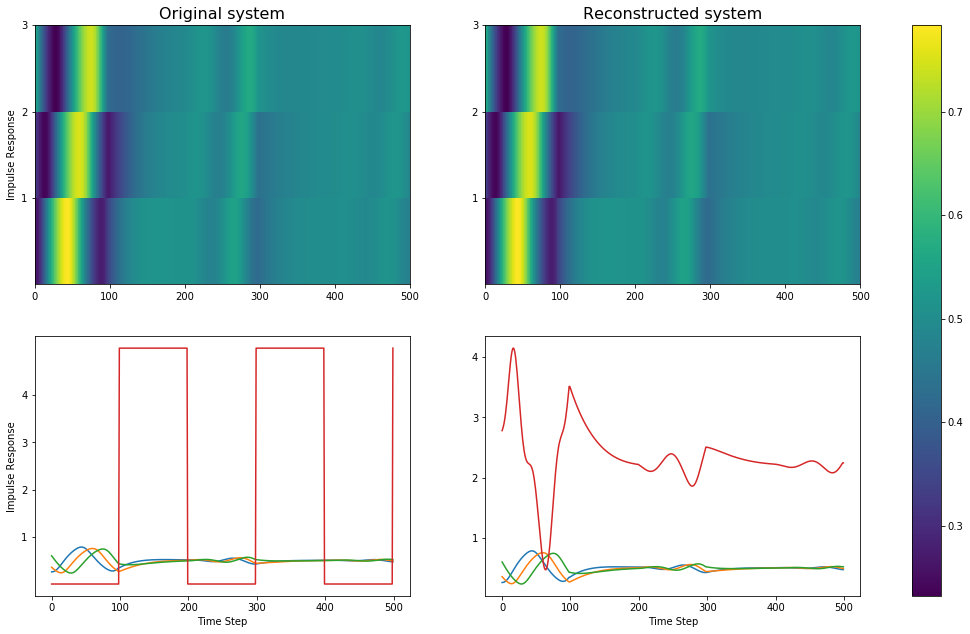

In [193]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)

ax[0,0].pcolor(data_high_freq[:500,:3].T)
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
ax[0,0].set_yticks([1,2,3])
# ax[0,0].set_xlabel("Impulse Response")
# ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmd_high_freq.reconstructed_data.real[:500,:3].T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})
ax[0,1].set_yticks([1,2,3])
# ax[0,1].set_xticks(np.arange(1, 4, 1))
# ax[0,1].set_xlabel("Impulse Response")
# ax[0,1].set_ylabel("Time Step")
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)
ax[1,0].plot(data_high_freq[:500,:])

# ax[1,0].set_xlabel("Time Step")
# ax[1,0].set_ylabel("Impulse Response")
ax[1,0].set_yticks([1,2,3,4])

ax[1,1].plot(dmd_high_freq.reconstructed_data.real[:500,:])
ax[1,1].set_yticks([1,2,3,4])
# ax[1,1].set_xlabel("Time Step")
# ax[1,1].set_ylabel("Impulse Response")
# ax.set_xlabel('common xlabel')
# ax.set_ylabel('common ylabel')
plt.setp(ax[-1, :], xlabel='Time Step')
plt.setp(ax[:, 0], ylabel='Impulse Response')
plt.show()

In [62]:
coss_dmd  = []
for i in range(4):
    coss_dmd.append(sp.distance.cosine(data_high_freq[:,i], dmd_high_freq.reconstructed_data.real[:,i]))
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_high_freq[:,i], dmd_high_freq.reconstructed_data.real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: -2.220446049250313e-16
cosine distance between y3: 1.1102230246251565e-16
cosine distance between y4: 0.3187463250792788


In [51]:
coss

[0.0, -2.220446049250313e-16, 1.1102230246251565e-16, 0.3187463250792788]

## Apply Control to OFF Data

In [194]:
A_tilde = dmd_high_freq.atilde

In [195]:
output=np.matmul(data_off[:,:3],A_tilde)


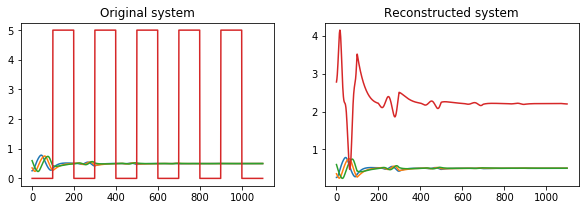

In [196]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.title('Original system')
plt.plot(data_high_freq[:,:])


plt.subplot(122)
plt.title('Reconstructed system')
plt.plot(dmd_high_freq.reconstructed_data.real)


plt.show()


## DMD with Control
### System Identification

__System__

\begin{equation}
X^{'}=AX + BY
\end{equation}

__We do not know the control matrix (_K_)__
\begin{equation}x_{k+1} = Ax_{k}+Bu_{k} \\
\end{equation}
__or__

\begin{equation}
u=Kx + \eta
\end{equation}


\begin{equation}X^{'}=\end{equation}

  \begin{bmatrix}
    A & B 
  \end{bmatrix}\begin{bmatrix}
    X \\
    Y \\
  \end{bmatrix} 


__We have to simultaneously solve for A and B.__

\begin{equation}
CL=A-B^{*}K 
\end{equation}

\begin{equation}
u=-K^{*}u
\end{equation}

In [28]:
#we need to parse the control signal u to the function
u=data_high_freq[:-1,3:]
u=np.repeat(u,3).reshape(1098,3)#we apply control to each node
u_2=data_low_freq[:-1,3:]
u_2=np.repeat(u_2,3).reshape(1098,3)

In [83]:
# dmdc_high_freq = DMDc(svd_rank=-1)
# dmdc_high_freq.fit(data_high_freq,u)

dmdc_low_freq = DMDc(svd_rank=4)
dmdc_low_freq.fit(data_low_freq.T,u_2.T)

for i in range(4):
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_low_freq.T[:,i], dmdc_low_freq.reconstructed_data().real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: 0.0009520413887879053
cosine distance between y3: 0.0016945983316586366
cosine distance between y4: 0.002530766916944649


/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:215: UserWarning: Input data matrix X has condition number 9.532172076934937e+32. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  .format(cond_number))


In [43]:
dmdc_low_freq_2 = DMDc(svd_rank=4, opt=True)
dmdc_low_freq_2.fit(data_low_freq.T,u.T)
for i in range(4):
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_low_freq.T[:,i], dmdc_low_freq_2.reconstructed_data().real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: 0.0009520413887877943
cosine distance between y3: 0.001519041295033996
cosine distance between y4: 0.002262448326765032


In [96]:
dmdc_high_freq = DMDc(svd_rank=4)
dmdc_high_freq.fit(data_high_freq.T,u.T)
for i in range(4):
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_low_freq.T[:,i], dmdc_low_freq_2.reconstructed_data().real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: 0.0009520413887877943
cosine distance between y3: 0.001519041295033996
cosine distance between y4: 0.002262448326765032


/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:215: UserWarning: Input data matrix X has condition number 2.732909690873848e+32. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  .format(cond_number))


In [87]:
dmdc_high_freq_2 = DMDc(svd_rank=4)
dmdc_high_freq_2.fit(data_high_freq.T,u.T)

coss_dmdc = []

for i in range(4):
    coss_dmdc.append(sp.distance.cosine(data_high_freq.T[:,i], dmdc_high_freq_2.reconstructed_data().real[:,i]))
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_high_freq.T[:,i], dmdc_high_freq_2.reconstructed_data().real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: 0.02033983842474263
cosine distance between y3: 0.03383066442596172
cosine distance between y4: 0.04028797332758538


/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:215: UserWarning: Input data matrix X has condition number 2.732909690873848e+32. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  .format(cond_number))


In [103]:
dmdc_high_freq_3 = DMDc(svd_rank=2)
dmdc_high_freq_3.fit(data_high_freq.T,u.T)

coss_dmdc = []

for i in range(4):
    coss_dmdc.append(sp.distance.cosine(data_high_freq.T[:,i], dmdc_high_freq_2.reconstructed_data().real[:,i]))
    print("cosine distance between y%s:" %(i+1),
          sp.distance.cosine(data_high_freq.T[:,i], dmdc_high_freq_2.reconstructed_data().real[:,i]))

cosine distance between y1: 0.0
cosine distance between y2: 0.02033983842474263
cosine distance between y3: 0.03383066442596172
cosine distance between y4: 0.04028797332758538


/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:215: UserWarning: Input data matrix X has condition number 2.732909690873848e+32. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  .format(cond_number))


In [75]:
cos_compar = pd.DataFrame()
cos_compar["Cosine Distance between"] = ["y1", "y2", "y3", "g"]
cos_compar["DMD"] = coss_dmd
cos_compar["DMDc"]  = coss_dmdc
coss_compar_latex = cos_compar.to_latex(index=False)


In [79]:
coss_compar_latex

'\\begin{tabular}{lrr}\n\\toprule\nCosine Distance between &           DMD &      DMDc \\\\\n\\midrule\n                     y1 &  0.000000e+00 &  0.000000 \\\\\n                     y2 & -2.220446e-16 &  0.020340 \\\\\n                     y3 &  1.110223e-16 &  0.033831 \\\\\n                      g &  3.187463e-01 &  0.040288 \\\\\n\\bottomrule\n\\end{tabular}\n'

Eigenvalue (0.1725621071400838+0j): distance from unit circle 0.9702223191793743
Eigenvalue (1.0002773038094794+0j): distance from unit circle 0.0005546845163615366
Eigenvalue (0.9866545597538598+0.13519169497760475j): distance from unit circle 0.00823598532599934
Eigenvalue (0.9866545597538598-0.13519169497760475j): distance from unit circle 0.00823598532599934


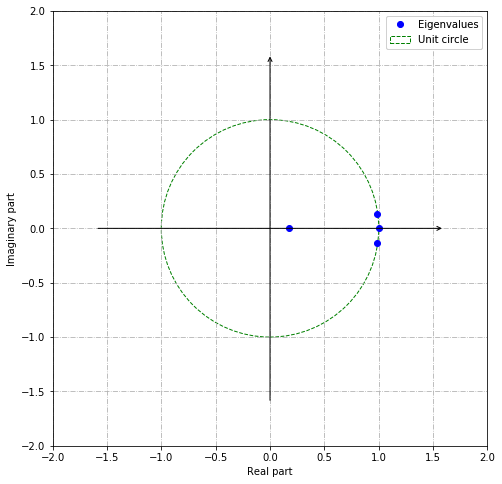

In [86]:
for eig in dmdc_low_freq_2.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmdc_low_freq_2.plot_eigs(show_axes=True, show_unit_circle=True)


Eigenvalue (0.24504976605722362+0j): distance from unit circle 0.9399506121553
Eigenvalue (1.0000184846068936+0j): distance from unit circle 3.69695554678362e-05
Eigenvalue (0.9938566882226894+0.06451137414409021j): distance from unit circle 0.00808716588106928
Eigenvalue (0.9938566882226894-0.06451137414409021j): distance from unit circle 0.00808716588106928


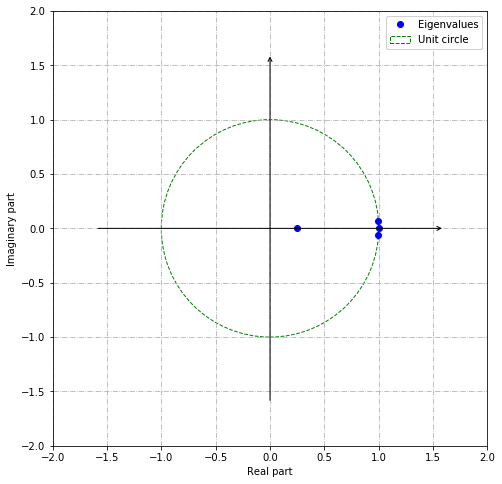

In [100]:
for eig in dmdc_high_freq.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmdc_high_freq.plot_eigs(show_axes=True, show_unit_circle=True)

In [204]:
# for eig in dmdc_high_freq.eigs:
#     print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

# dmdc_high_freq.plot_eigs(show_axes=True, show_unit_circle=True)

In [205]:
# plt.figure(figsize=(10,8))

# plt.subplot(121)
# plt.title('Original system')
# plt.pcolor(data_high_freq[:,:])
# plt.colorbar()

# plt.subplot(122)
# plt.title('Reconstructed system')
# plt.pcolor(dmdc_high_freq.reconstructed_data().real)
# plt.colorbar()

# plt.show()

In [206]:
# plt.figure(figsize=(10,3))

# plt.subplot(121)
# plt.title('Original system')
# plt.plot(data_high_freq)


# plt.subplot(122)
# plt.title('Reconstructed system')
# plt.plot(dmdc_high_freq_2.reconstructed_data().real.T)


# plt.show()

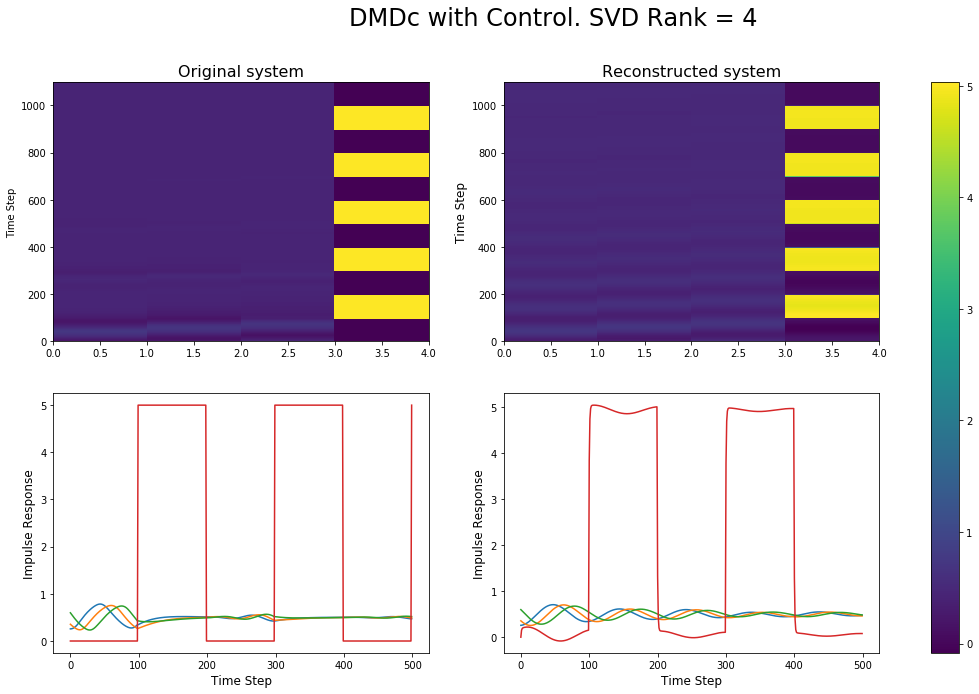

In [99]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("DMDc with Control. SVD Rank = 4" , fontsize=24)

ax[0,0].pcolor(data_high_freq[:,:])
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmdc_high_freq.reconstructed_data().real.T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step", fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_high_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_high_freq.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:126: RuntimeWarning: invalid value encountered in log
  omega = old_div(np.log(self.eigs), self.original_time['dt'])
/Users/maria_p/opt/anaconda3/lib/python3.7/site-packages/pydmd/dmdbase.py:126: RuntimeWarning: invalid value encountered in log
  omega = old_div(np.log(self.eigs), self.original_time['dt'])


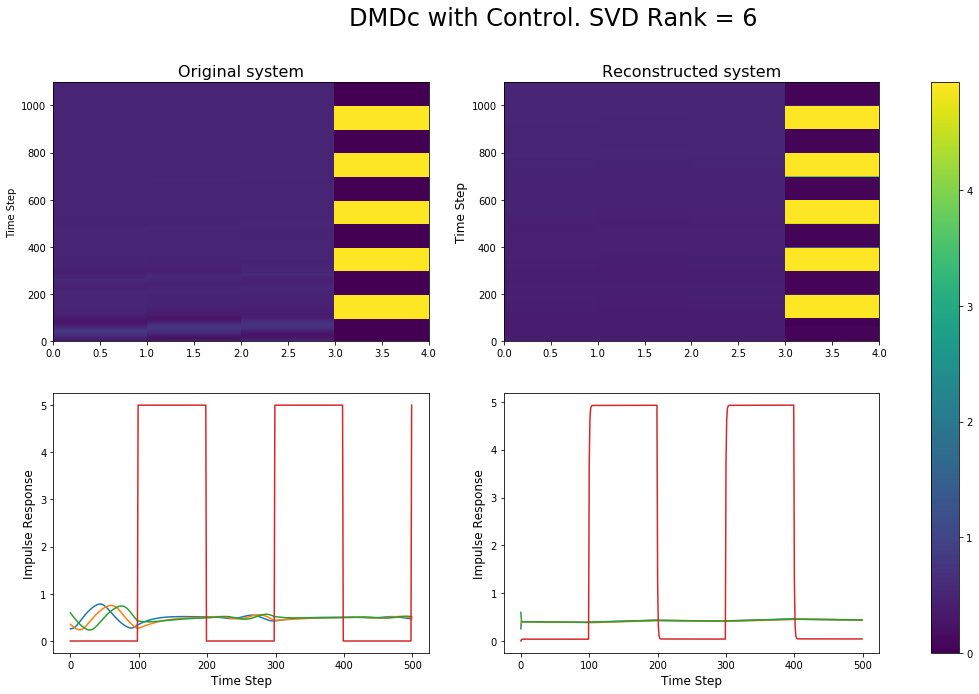

In [104]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("DMDc with Control. SVD Rank = 6" , fontsize=24)

ax[0,0].pcolor(data_high_freq[:,:])
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmdc_high_freq_3.reconstructed_data().real.T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step", fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_high_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_high_freq_3.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

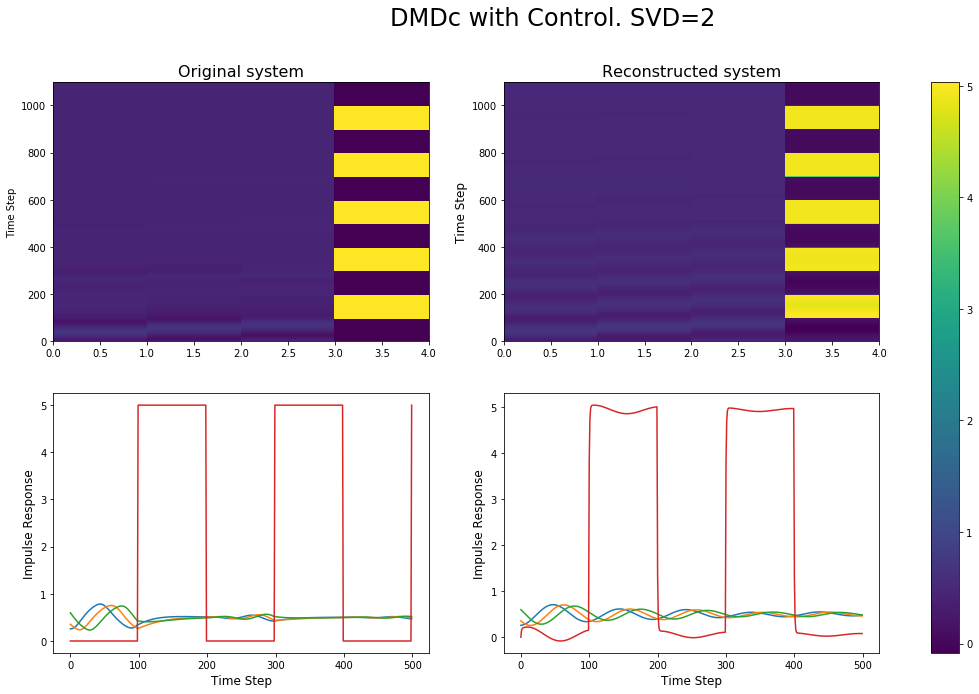

In [105]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("DMDc with Control. SVD=2" , fontsize=24)

ax[0,0].pcolor(data_high_freq[:,:])
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmdc_high_freq_2.reconstructed_data().real.T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step", fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_high_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_high_freq_2.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

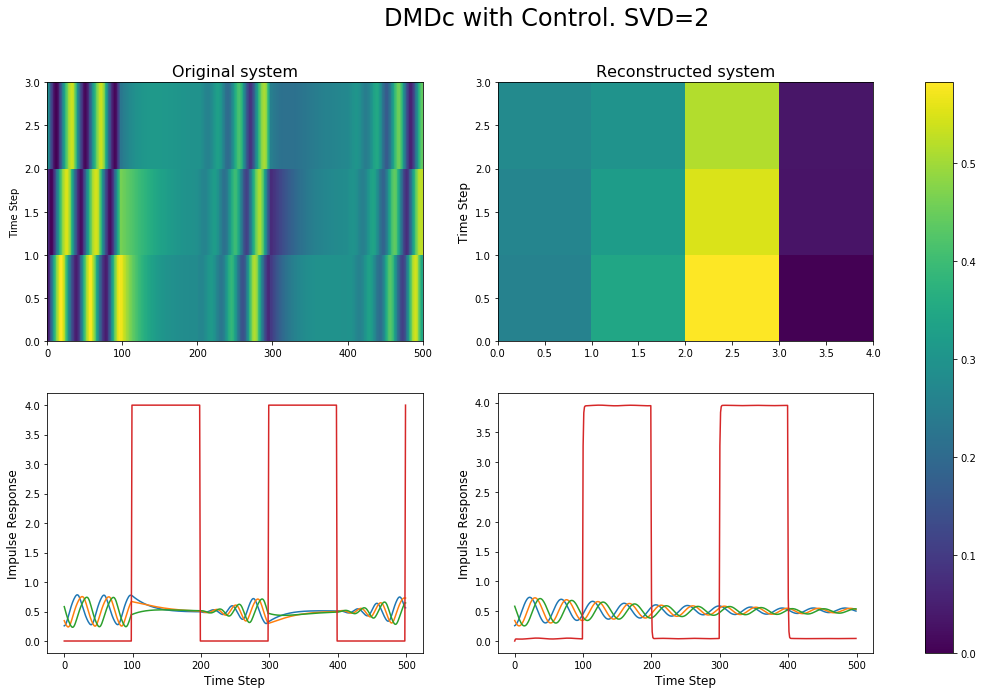

In [213]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("DMDc with Control. SVD=2" , fontsize=24)

ax[0,0].pcolor(data_low_freq[:500,:3].T)
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmdc_low_freq.reconstructed_data().real[:500,:3].T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step", fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_low_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_low_freq.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

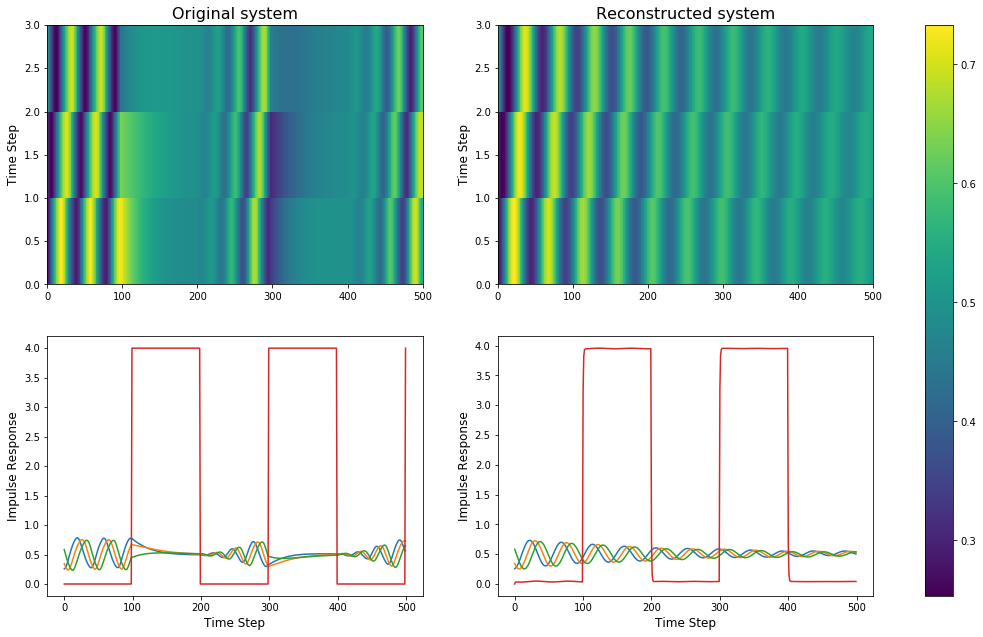

In [248]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)

ax[0,0].pcolor(data_low_freq[:500,:3].T)
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step", fontdict={"fontsize":12})


pcm  = ax[0,1].pcolor(dmdc_low_freq.reconstructed_data().real[:3, :500])
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step",fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_low_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step",fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_low_freq.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

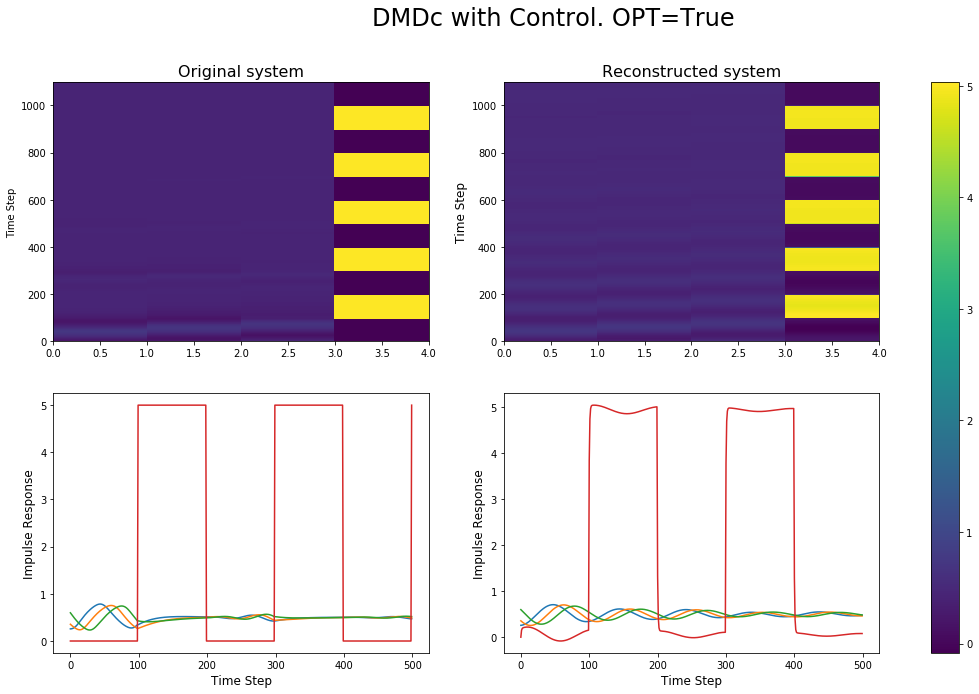

In [215]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("DMDc with Control. OPT=True" , fontsize=24)

ax[0,0].pcolor(data_high_freq[:,:])
ax[0,0].set_title('Original system', fontdict={"fontsize":16})
# ax[0,0].set_xlabel("Impulse Response")
ax[0,0].set_ylabel("Time Step")


pcm  = ax[0,1].pcolor(dmdc_high_freq_2.reconstructed_data().real.T)
ax[0,1].set_title('Reconstructed system', fontdict={"fontsize":16})

# ax[0,1].set_xlabel("Impulse Response")
ax[0,1].set_ylabel("Time Step", fontdict={"fontsize":12})
#ax[0,1].colorbar()
fig.colorbar(pcm,ax=ax)

ax[1,0].plot(data_high_freq[:500,:])
# ax[1,0].set_xticks(np.arange(1, 4, 1))
ax[1,0].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,0].set_ylabel("Impulse Response", fontdict={"fontsize":12})

ax[1,1].plot(dmdc_high_freq_2.reconstructed_data().real.T[:500,:])
# ax[1,1].set_yticks([1,2,3,4])
ax[1,1].set_xlabel("Time Step", fontdict={"fontsize":12})
ax[1,1].set_ylabel("Impulse Response", fontdict={"fontsize":12})
plt.show()

### Apply control to OFF Data



In [135]:
def apply_control(signal,u_init, A_tilde, B):
#     signal_truncated = np.matmul(C.T,signal)
    output1=np.matmul(A_tilde, signal)
    output2 =  np.matmul(u_init, B.T)
#     for i in range(signal[1].size-1):
#        output1[:,i] =output1[:,i]+output2
    return output2

In [136]:
data_off_test = pd.read_csv("./three_nodes_data_g_6.csv").values

In [137]:
A_tilde = dmdc_high_freq.atilde[:3,:3]
B = dmdc_high_freq.B
A_tilde_2 = dmdc_low_freq.atilde[:3,:3]
B_2 = dmdc_low_freq.B
u_init = np.random.uniform(low=0, high=6, size=(1099,3))
signal = data_off_test[100:100+1099,:3]
print(A_tilde_2.shape,signal.shape, B.shape, u_init.shape)

(4, 4) (998, 3) (4, 3) (1099, 3)


In [1]:
# result  = apply_control(signal, u_init, A_tilde, B)
# result_2= apply_control(signal, u_init, A_tilde_2, B_2)

In [2]:
# fig, ax = plt.subplots(3, 1, sharex=False, sharey=False)
# fig.set_size_inches(6, 8)

# ax[0].plot(signal[:500,:3])
# ax[0].set_yticks([0, 0.5,1])
# ax[0].set_title("Signal",fontsize=14)

# ax[1].plot(result_2[:500,:3])
# ax[1].set_title("Signal after applying control learned on \n the Low Voltage data", fontsize=14)

# # ax[2].set_yticks([-0.002,0, 0.0002])
# ax[2].plot(result[:500,:3])
# ax[2].set_title("Signal after applying control learned on the \n High Voltage Data", fontsize=14)

# fig.text(0.55, 0.007, 'Time Steps', ha='center',fontsize=18 )
# fig.text(0.05, 0.5, 'Impulse Response', va='center', rotation='vertical', fontsize=18)
# fig.tight_layout(pad=2.0)


# plt.show()